# Lab 2 Text Data

Cameron Matson

## Purpose

This dataset is a collection reviews from Pitchfork, a music review site.  It 18,393 reviews contains reviews from 1999 to the present day.  They look at a variety There is a lot of research being done related to the way that people interact with music, specifically how they describe it in words.  What I'd like to get out of this data is if there is any relation between way the music is described in the reviews and the music itself.

The data was acquired at https://www.kaggle.com/nolanbconaway/pitchfork-data

## Data
### Aggregation and Cleaning

The data was stored in a database in several tables, so first we need to restructure it.

In [75]:
import pandas as pd
import numpy as np

reviews = pd.read_csv('../data/reviews.csv')
print('number of reviews:',len(reviews))
reviews.head()

number of reviews: 18393


,reviewid,content
0,22703,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,"Eight years, five albums, and two EPs in, the ..."
2,22659,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,Kleenex began with a crash. It transpired one ...
4,22725,It is impossible to consider a given release b...


In [76]:
meta = pd.read_csv('../data/meta.csv')
meta.info()
meta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
reviewid          18393 non-null int64
title             18391 non-null object
artist            18391 non-null object
url               18393 non-null object
score             18393 non-null float64
best_new_music    18393 non-null int64
author            18393 non-null object
author_type       14487 non-null object
pub_date          18393 non-null object
pub_weekday       18393 non-null int64
pub_day           18393 non-null int64
pub_month         18393 non-null int64
pub_year          18393 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


All we want from the meta data is the score and best_new_music feature, because we want to see if we can label the reviewers feelings about the album from the text itself.

In [77]:
meta.drop(['title','artist', 'url', 'author', 'author_type', 'pub_date', 'pub_weekday', 'pub_day', 'pub_month', 'pub_year'], axis=1, inplace=True)
meta.info()
meta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 3 columns):
reviewid          18393 non-null int64
score             18393 non-null float64
best_new_music    18393 non-null int64
dtypes: float64(1), int64(2)
memory usage: 431.2 KB


,reviewid,score,best_new_music
0,22703,9.3,0
1,22721,7.9,0
2,22659,7.3,0
3,22661,9.0,1
4,22725,8.1,0


Finally we want the genre to see if we can infer that from the review

In [78]:
genres = pd.read_csv('../data/genres.csv')

# some have multiple genres, for now lets just choose the first one
genres.drop_duplicates(subset=['reviewid'],inplace=True)

genres.info()
genres.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 22679
Data columns (total 2 columns):
reviewid    18389 non-null int64
genre       16024 non-null object
dtypes: int64(1), object(1)
memory usage: 431.0+ KB


,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


It appears that some of the reviews didn't have genres listed.  We'll drop these.

In [79]:
genres.dropna(inplace=True)
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16024 entries, 0 to 22676
Data columns (total 2 columns):
reviewid    16024 non-null int64
genre       16024 non-null object
dtypes: int64(1), object(1)
memory usage: 375.6+ KB


In [80]:
df = pd.merge(genres, reviews, on='reviewid')
df = pd.merge(df, meta, on='reviewid')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16030 entries, 0 to 16029
Data columns (total 5 columns):
reviewid          16030 non-null int64
genre             16030 non-null object
content           16021 non-null object
score             16030 non-null float64
best_new_music    16030 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 751.4+ KB


,reviewid,genre,content,score,best_new_music
0,22703,electronic,"“Trip-hop” eventually became a ’90s punchline,...",9.3,0
1,22721,metal,"Eight years, five albums, and two EPs in, the ...",7.9,0
2,22659,rock,Minneapolis’ Uranium Club seem to revel in bei...,7.3,0
3,22661,rock,Kleenex began with a crash. It transpired one ...,9.0,1
4,22725,electronic,It is impossible to consider a given release b...,8.1,0


Looks like there were still a few reviews that didn't match up in all three tables, or that there were some null values in which if fine, we'll just drop to the lowest common denominator

In [81]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16021 entries, 0 to 16029
Data columns (total 5 columns):
reviewid          16021 non-null int64
genre             16021 non-null object
content           16021 non-null object
score             16021 non-null float64
best_new_music    16021 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 751.0+ KB


That's a lot of reviews, for efficiency's sake lets just take a sample

In [82]:
df = df.sample(n=1000).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 7310 to 4579
Data columns (total 5 columns):
reviewid          1000 non-null int64
genre             1000 non-null object
content           1000 non-null object
score             1000 non-null float64
best_new_music    1000 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB



## Feature Representation
### Bag of Words


In [83]:
from sklearn.feature_extraction.text import CountVectorizer

# make a CountVectorizer object
counter = CountVectorizer(stop_words='english')

all_text = df.content.tolist()

# use counter object to transorm the text in to BOW
bag_words = counter.fit_transform(all_text)
print(bag_words.shape)

(1000, 36712)


In [84]:
#print(counter.vocabulary_)

That's a lot of words.  How might we be able to reduce it?  The problem is that the most common way that people talk about music is through metaphor, so it makes it difficult to choose a narrow vocabulary in general.  However, for this analysis, we are primarilly concerned with how the reviewer *described* the album, therefore we might limit our vocabulary to words that describe things i.e. adjectives and adverbs.

To do this we'll use a Parts of Speech Tagger from the Natrual Language Toolkit.  We will be using a unigram tagger, which assigns the most common tag to a word, based on a corpus.  We do this because our bag of words model has already stripped the potential part of speech context provided by the sentence.

In [96]:
%%time
from nltk.tag import UnigramTagger
from nltk.corpus import brown

vocab = []

# Unigram Tagger is an object that is trained on an already tagged dataset, in this case the Brown Corpus.
# https://en.wikipedia.org/wiki/Brown_Corpus
unigram_tagger = UnigramTagger(brown.tagged_sents())

for tok, tag in unigram_tagger.tag([w for w in counter.vocabulary_.keys()]):
    if tag is not None and (tag[0:2] == 'JJ' or tag[0:2] == 'RB'):
        vocab.append(tok)


CPU times: user 13.1 s, sys: 336 ms, total: 13.4 s
Wall time: 15.6 s


In [97]:
print(len(vocab))

3785


Hey! That seems very managable!

In [98]:
    
counter = CountVectorizer(stop_words='english', vocabulary=vocab) # an object capable of counting words in a document!
bag_words = counter.fit_transform(all_text)
print(bag_words.shape)

(1000, 3785)


In [99]:
df_bow = pd.DataFrame(data=bag_words.toarray(), columns=counter.get_feature_names())

# this will return only columns that aren't all 0
df_bow = df_bow.loc[:, (df_bow != 0).any(axis=0)]
df_bow.shape

(1000, 3785)

Look at that--it got smaller.

In [100]:
df_bow

,common,doggedly,personal,old,intractable,pleasing,onward,especially,small,quiet,...,powerless,moneyed,jubilantly,crummy,lacey,aberrant,silliest,unanimously,alkaline,aflame
0,1,1,2,3,1,1,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Better.

### TF-IDF
A more compmlex representation of the dataset would be term frequency, inverse document frequency or TFIDF which takes into consideration not only how frequently a word appears in each document (tf), but also how frequently it appears in the corpus as a whole (idf).

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TFIDF object
tfidfer = TfidfVectorizer(stop_words='english', vocabulary=vocab)


tfidf = tfidfer.fit_transform(all_text)
print(tfidf.shape)

df_tfidf = pd.DataFrame(data=tfidf.toarray(),columns=tfidfer.get_feature_names())
df_tfidf.head()


(1000, 3785)


,common,doggedly,personal,old,intractable,pleasing,onward,especially,small,quiet,...,powerless,moneyed,jubilantly,crummy,lacey,aberrant,silliest,unanimously,alkaline,aflame
0,0.097235,0.154856,0.17552,0.167889,0.17327,0.130515,0.146397,0.071418,0.235898,0.09612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.00000,0.000000,0.00000,0.136615,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.078197,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.073235,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# 10 highest tfidf terms
df_tfidf.max().sort_values()[-10:]

vile         0.850944
orbital      0.852597
tricky       0.855909
cruel        0.862002
rugged       0.867661
oval         0.878169
dangerous    0.895969
purple       0.901917
hot          0.903004
haggard      0.927484
dtype: float64

## Summary Statistics

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.head()

,reviewid,genre,content,score,best_new_music
2068,20361,rock,Don’t let the unfamiliar name and empty discog...,6.7,0
13682,947,electronic,The little-known 1970 Czech vampire film Valer...,8.2,0
10231,9770,rock,"Psychic Ills' debut, Dins, toed several differ...",6.1,0
3409,18425,experimental,You might not think a group called Bitchin Baj...,7.6,0
5934,15013,rock,Fujiya & Miyagi have always been open about th...,6.3,0


### Word Frequencies

**insert viz code here**

### Document Length
First we need to add a feature corresponding to the length of the review

In [187]:
df['length'] = df.content.str.len()

In [188]:
df.length.describe()

count     1000.000000
mean      4053.134000
std       1357.824755
min        551.000000
25%       3051.000000
50%       3771.500000
75%       4757.000000
max      12068.000000
Name: length, dtype: float64

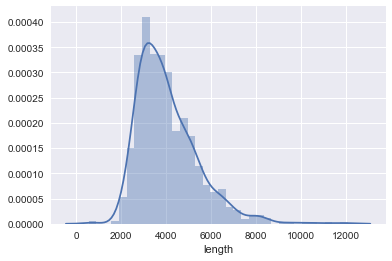

In [189]:
sns.distplot(df.length)

Looks like a nice normal distribution with a long left tail, which make sense.  They probably have at pitchfork a standard min and max length for reviews, with the occasional long winded write-up thrown in.

### most relevant words

**insert viz code here**

### vocabulary size

**insert viz code here**

## Relation to Target Class

What we want to do is look at how the text relates to the following labels:
   - genre
   - reviewer emotion (score/best_new_music)

In [1]:
from nltk.corpora import wordnet as wn

for synset in list(wn.all_synsets('n')):
    print(synset)


ModuleNotFoundError: No module named 'nltk.corpora'